In [3]:
import pandas as pd

In [4]:
# attribut = ['Class', 'Age', 'Menopause','tumor-size', 'inv-node', 'node-capes', 'deg-malig', 'breast', 'breast-quad', 'irradiat']
df = "Dataset/breast-cancer.csv"
df = pd.read_csv(df, sep=';', header='infer')
# Done
df['Class'] = df['Class'].replace(['no-recurrence-events'],'no-recurrence-events').replace(['recurrence-events'],'recurrence-events')
# Done
df['Age'] = df['Age'].replace(['20-29'],'20-29').replace(['30-39'],'30-39').replace(['40-49'],'40-49').replace(['50-59'],'50-59').replace(['60-69'],'60-69').replace(['70-79'],'70-79')
# Done
df['Menopause']= df['Menopause'].replace(['premeno'],'premeno').replace(['ge40'], 'ge40').replace(['lt40'], 'lt40')    
# Done
df['tumor-size']= df['tumor-size'].replace(['0-4'], '0-4').replace(['05-Sep'], '5-9').replace(['Okt-14'], '10-14').replace(['15-19'], '15-19').replace(['20-24'],'20-24').replace(['25-29'],'25-29').replace(['30-34'],'30-34').replace(['35-39'],'35-39').replace(['40-44'],'40-44').replace(['45-49'],'45-49').replace(['50-54'],'50-54')
# Done
df['inv-node'] = df['inv-node'].replace(['0-2'],'0-2').replace(['03-Mei'],'3-5').replace(['06-Agu'],'6-8').replace(['09-Nov'],'9-11').replace(['Des-14'], '12-14') 
# Done
df['node-capes'] = df['node-capes'].replace(['?'],'?').replace(['no'],'no').replace(['yes'],'yes')
# Done
df['deg-malig'] = df['deg-malig'].replace(['1'],1).replace(['2'],2).replace(['3'],3)
# Done
df['breast'] = df['breast'].replace(['left'],'left').replace(['right'],'right')
# Done
df['breast-quad'] = df['breast-quad'].replace(['?'],'?').replace(['left_low'],'left_low').replace(['left_up'], 'left_up').replace(['right_low'], 'right_low').replace(['right_up'], 'right_up').replace(['central'],'central')
# Done
df['irradiat'] = df['irradiat'].replace(['no'],'no').replace(['yes'],'yes')
df.head()

,Class,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
enc = LabelEncoder()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   Age          286 non-null    object
 2   Menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-node     286 non-null    object
 5   node-capes   286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [8]:
df['Age'] = enc.fit_transform(df['Age'].values)
df['Menopause'] = enc.fit_transform(df['Menopause'].values)
df['tumor-size'] = enc.fit_transform(df['tumor-size'].values)
df['inv-node'] = enc.fit_transform(df['inv-node'].values)
df['node-capes'] = enc.fit_transform(df['node-capes'].values)
df['breast'] = enc.fit_transform(df['breast'].values)
df['breast-quad'] = enc.fit_transform(df['breast-quad'].values)
df['irradiat'] = enc.fit_transform(df['irradiat'].values)
df

,Class,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,1,2,5,0,1,3,0,2,0
1,no-recurrence-events,2,2,3,0,1,2,1,5,0
2,no-recurrence-events,2,2,3,0,1,2,0,2,0
3,no-recurrence-events,4,0,2,0,1,2,1,3,0
4,no-recurrence-events,2,2,0,0,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,1,2,5,0,1,2,0,3,0
282,recurrence-events,1,2,3,0,1,3,0,3,1
283,recurrence-events,4,0,3,0,1,1,1,3,0
284,recurrence-events,2,0,5,4,1,3,0,2,0


In [9]:
data = df.drop(['Class'], axis=1)
data

,Age,Menopause,tumor-size,inv-node,node-capes,deg-malig,breast,breast-quad,irradiat
0,1,2,5,0,1,3,0,2,0
1,2,2,3,0,1,2,1,5,0
2,2,2,3,0,1,2,0,2,0
3,4,0,2,0,1,2,1,3,0
4,2,2,0,0,1,2,1,4,0
...,...,...,...,...,...,...,...,...,...
281,1,2,5,0,1,2,0,3,0
282,1,2,3,0,1,3,0,3,1
283,4,0,3,0,1,1,1,3,0
284,2,0,5,4,1,3,0,2,0


In [10]:
from sklearn import tree

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
data_train = clf.fit(data, df['Class'])

In [12]:
import pydotplus
from IPython.display import Image

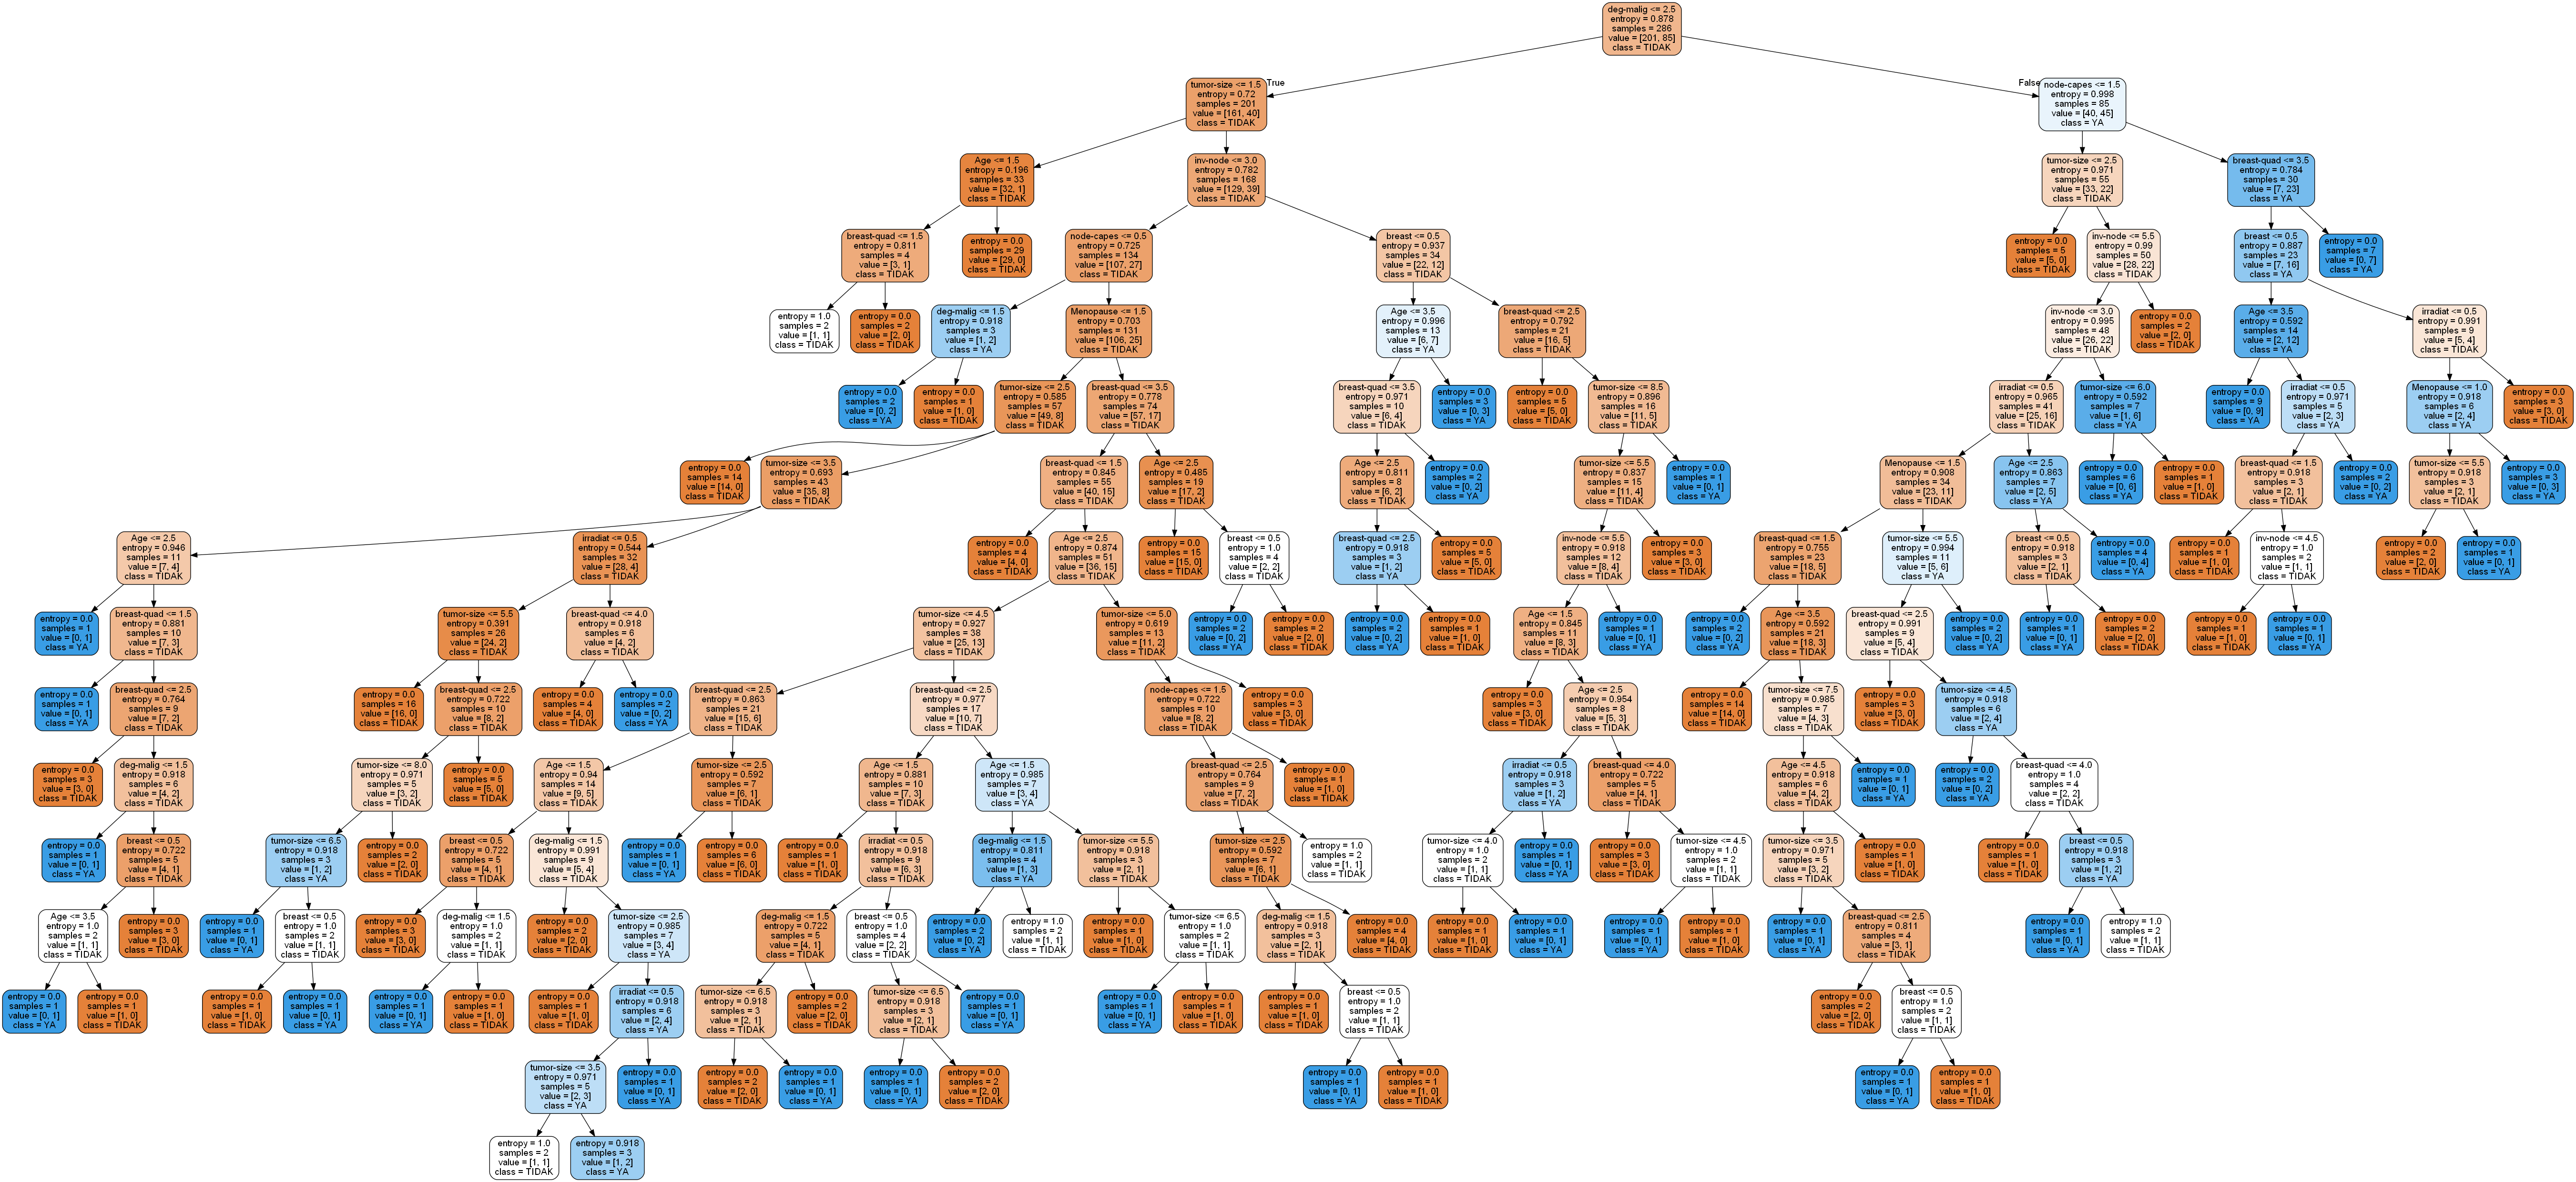

In [13]:
dot_data = tree.export_graphviz(data_train, out_file=None, feature_names=list(data.columns.values),
    class_names=['TIDAK', 'YA'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [22]:
predY = clf.predict(data)
testY = df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(data, testY, test_size=0.5, random_state=3)
Conf_mat = SVC(random_state = 1)
Conf_mat.fit(xtrain, ytrain)
akurasi = accuracy_score(testY, predY)
prediksi = Conf_mat.predict(xtest)



print("Nilai akurasi pada data testing : %.2f" % (akurasi*100))
print("\n", "Confusion matrix: \n", confusion_matrix(ytest, prediksi))

Nilai akurasi pada data testing : 97.90

 Confusion matrix: 
 [[98  2]
 [40  3]]
